In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import doralite
import gfdl_utils.core as gu
from CM4Xutils import *

In [37]:
model = "CM4Xp125"
exp = "piControl"

In [40]:
path_dict = doralite.dora_metadata(CM4Xutils.exp_dict[model][exp])
path_dict

{'displayName': None,
 'expLabels': None,
 'expLength': None,
 'expMIP': None,
 'expName': 'CM4_piControl_c192_OM4p125_v8',
 'expType': 'piControl',
 'expYear': None,
 'gfdlHistoryYear': None,
 'id': 2198,
 'jobID': None,
 'master_id': 2198,
 'modelType': 'CM4',
 'owner': 'Raphael.Dussin',
 'pathAnalysis': '/nbhome/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/',
 'pathDB': '/home/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/db/',
 'pathLog': None,
 'pathPP': '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/',
 'pathScript': '/lustre/f2/dev/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/ncrc5.intel22-prod-openmp/scripts/CM4_piControl_c192_OM4p125_v8/',
 'pathXML': '/home/Raphael.Dussin/ncrc/RUNS/xml_projects/CM4_piControl_c192_OM4p125_rerun_c5.xml/',
 'queue': None,
 'refresh': None,
 'requested_i

In [41]:
og = xr.open_dataset(gu.get_pathstatic(path_dict["pathPP"], "ocean_annual_z_d2"))
og.dims

FrozenMappingWarningOnValuesAccess({'yq': 1121, 'xq': 1441, 'yh': 1120, 'xh': 1440})

In [42]:
og_sym = xr.open_dataset("/archive/Raphael.Dussin/datasets/OM4p125/mosaic_c192_om4p125_bedmachine_v20210310_hydrographyKDunne20210614_unpacked/ocean_static_d2_sym.nc")
og_sym.dims

FrozenMappingWarningOnValuesAccess({'xh': 1440, 'yq': 1121, 'xq': 1441, 'yh': 1120})

In [43]:
sg = xr.open_dataset(exp_dict[model]["hgrid"])

In [44]:
import matplotlib.pyplot as plt

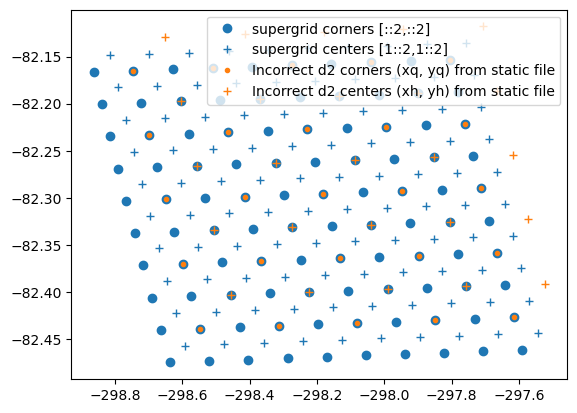

In [45]:
for i in range(10):
    for j in range(10):
        plt.plot(sg.x[::2,::2][j,i], sg.y[::2,::2][j,i], "C0o")
        plt.plot(sg.x[1::2,1::2][j,i], sg.y[1::2,1::2][j,i], "C0+")

for i in range(5):
    for j in range(5):
        plt.plot(og.geolon_c[j,i], og.geolat_c[j,i], "C1.")
        plt.plot(og.geolon[j,i], og.geolat[j,i], "C1+")

plt.plot([], [], "C0o", label="supergrid corners [::2,::2]")
plt.plot([], [], "C0+", label="supergrid centers [1::2,1::2]")
plt.plot([], [], "C1.", label="Incorrect d2 corners (xq, yq) from static file")
plt.plot([], [], "C1+", label="Incorrect d2 centers (xh, yh) from static file")
plt.legend();

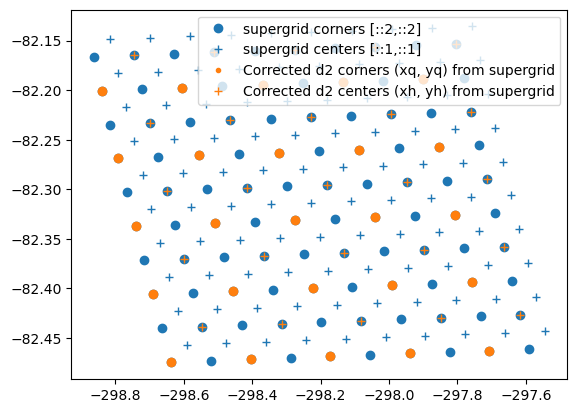

In [46]:
for i in range(10):
    for j in range(10):
        plt.plot(sg.x[::2,::2][j,i], sg.y[::2,::2][j,i], "C0o")
        plt.plot(sg.x[1::2,1::2][j,i], sg.y[1::2,1::2][j,i], "C0+")

for i in range(5):
    for j in range(5):
        plt.plot(sg.x[::4,::4][j,i], sg.y[::4,::4][j,i], "C1o")
        plt.plot(sg.x[2::4,2::4][j,i], sg.y[2::4,2::4][j,i], "C1+")

plt.plot([], [], "C0o", label="supergrid corners [::2,::2]")
plt.plot([], [], "C0+", label="supergrid centers [::1,::1]")
plt.plot([], [], "C1.", label="Corrected d2 corners (xq, yq) from supergrid")
plt.plot([], [], "C1+", label="Corrected d2 centers (xh, yh) from supergrid")
plt.legend();

In [49]:
pp = path_dict["pathPP"]
ppname = "ocean_annual_z"
out = "ts"
local = gu.get_local(pp, ppname, out)
time = "*0361*"

ds = gu.open_frompp(pp, ppname, out, local, time, "*volcello*", dmget=True)

pp = path_dict["pathPP"]
ppname = "ocean_annual_z_d2"
out = "ts"
local = gu.get_local(pp, ppname, out)
time = "*0361*"

ds_d2 = gu.open_frompp(pp, ppname, out, local, time, "*volcello*", dmget=True)

Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.


In [54]:
i = 0
j = 200
ds.volcello.isel(xh=slice(i*2,(i+1)*2), yh=slice(j*2,(j+1)*2), time=0).sum().values, ds_d2.volcello.isel(xh=slice(i,i+1), yh=slice(j,j+1), time=0).sum("z_l").values

(array(5.5082634e+11, dtype=float32), array([[5.5082634e+11]], dtype=float32))